In [1]:
%matplotlib inline

import cv2
import numpy as np
from PIL import Image
from IPython.display import display
from matplotlib import pyplot as plt

## Load, resize and combine images

In [2]:
# load image
xi = cv2.imread('./imgs/xi.jpg')
rose = cv2.imread('./imgs/rose.jpg')

# check the shape of image
print(xi.shape, rose.shape)

(335, 268, 3) (773, 580, 3)


In [3]:
# Resize rose to the size of Xi
rose = cv2.resize(rose, dsize=(xi.shape[1], xi.shape[0]))
print(rose.shape)

(335, 268, 3)


In [4]:
# Add weight
mix = cv2.addWeighted(xi, 0.7, rose, 0.3, 1)

# Save the mixed image
# cv2.imwrite('./imgs/xi_rose.jpg', mix)

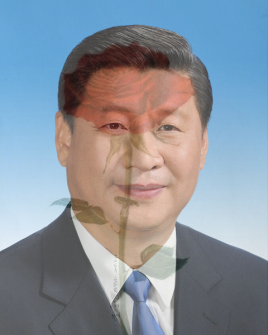

In [5]:
# Show the image
display(Image.fromarray(mix[:,:,::-1]))

# cv2.imshow('mixed', mix)
# cv2.waitKey(0)  # wait for any key
# cv2.destroyAllWindows()  # close the image window

## Grayscale

In [6]:
# colorful image is 3D: height, width and pixel
print(rose.shape)

(335, 268, 3)


(335, 268)


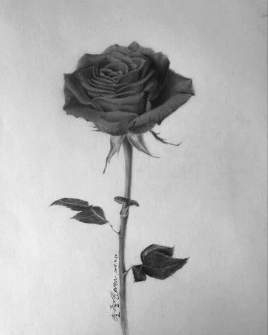

In [7]:
# convert color to gray
gray = cv2.cvtColor(rose, code=cv2.COLOR_BGR2GRAY)

# the shape of gray image is 2D: height and width
print(gray.shape)

# Show the image
display(Image.fromarray(gray))

# cv2.imwrite('./imgs/gray.jpg', gray)

## Image Thresholding

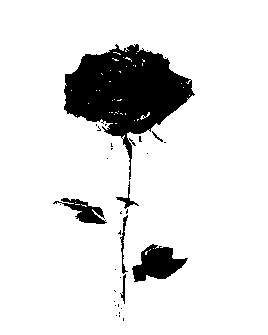

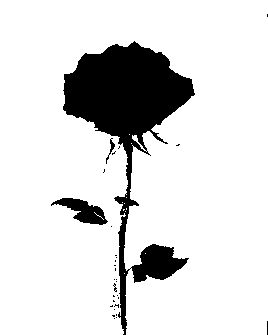

In [8]:
# method1: THRESH_BINARY
threshold, dst = cv2.threshold(gray, 100, 255, type=cv2.THRESH_BINARY)
# cv2.imwrite('./imgs/thresh_binary.jpg', dst)
display(Image.fromarray(dst))

# method2: THRESH_OTSU
threshold, dst = cv2.threshold(gray, 100, 255, type=cv2.THRESH_OTSU)
# cv2.imwrite('./imgs/thresh_otsu.jpg', dst)
display(Image.fromarray(dst))

## Face recognition

In [9]:
# Read the person image
person = cv2.imread('./imgs/han.jpg')
gray_person = cv2.cvtColor(person, code=cv2.COLOR_BGR2GRAY)

In [10]:
# Load the face character
face_detector = cv2.CascadeClassifier('./data/haarcascade_frontalface_alt.xml')
faces = face_detector.detectMultiScale(gray_person)

# the location of faces:
print(faces)

[[434 108 183 183]]


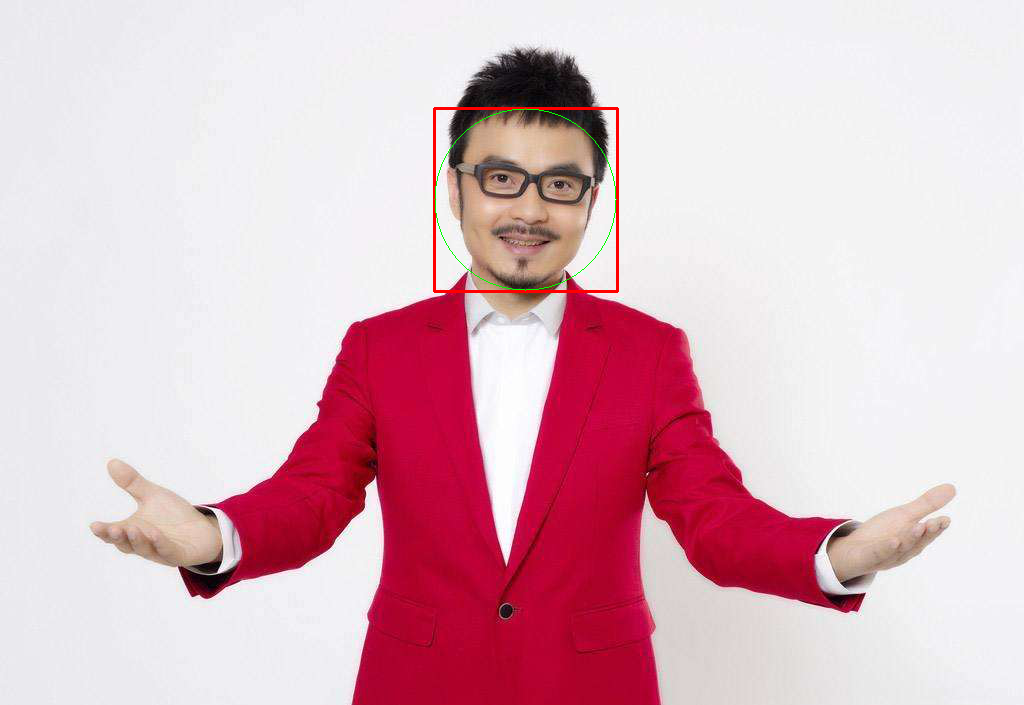

In [11]:
# draw the rectangle for the faces
for x,y,w,h in faces:
    # draw the rectangle
    cv2.rectangle(person,
                  pt1=(x,y),  # upper left
                  pt2=(x+w, y+h),  # lower right
                  color=[0,0,255],  # BGR
                  thickness=2,  # thick
                 )
    # draw the circle
    cv2.circle(person,
               center=(x+w//2, y+h//2),
               radius=w//2,
               color=[0, 255, 0],
              )

display(Image.fromarray(person[:,:,::-1]))
# cv2.imwrite('./imgs/detected_face.jpg', person)

### Replace face

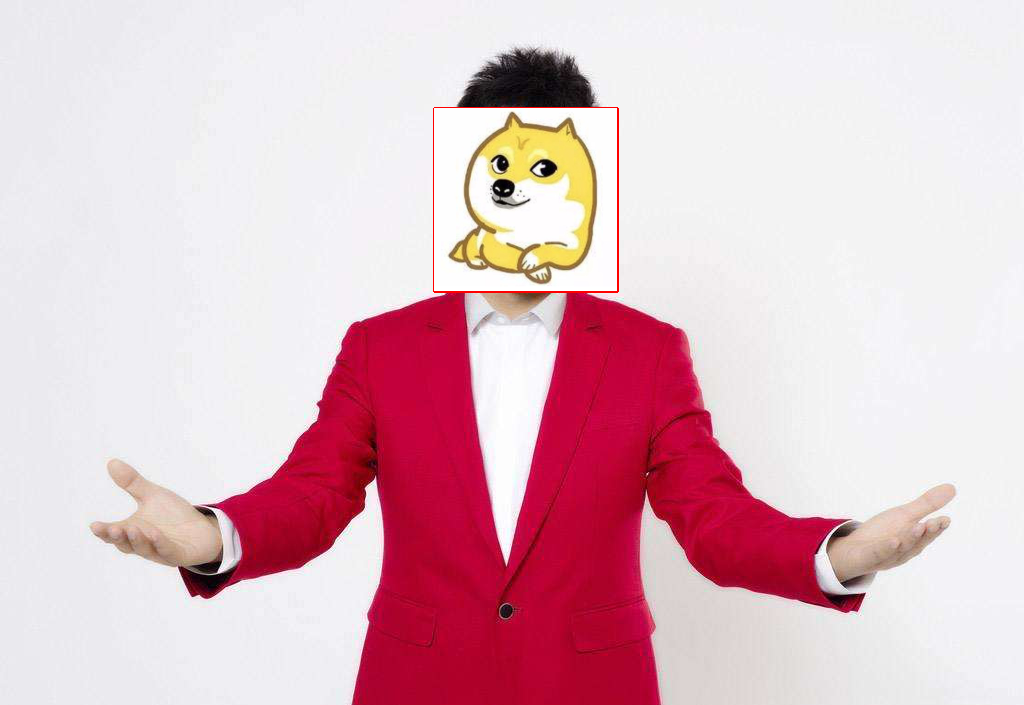

In [12]:
# Read the head image
head = cv2.imread('./imgs/head.jpg')

# replace the face
for x, y, w, h in faces:
    # Resize
    resized_head = cv2.resize(head, dsize=(w, h))
    # Find the face region by the location and reassign using slice
    person[y:y+h, x:x+w] = resized_head

display(Image.fromarray(person[:,:,::-1]))

### Replace face with contour

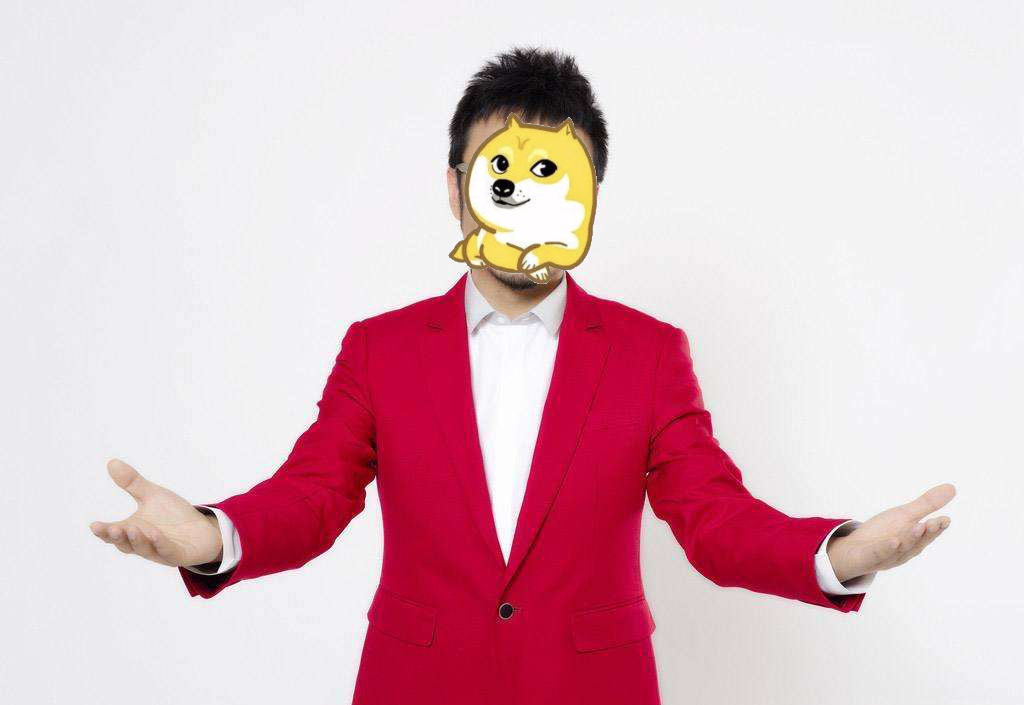

In [13]:
# Read the person image again
person = cv2.imread('./imgs/han.jpg')

# Convert the head image to gray and binaray it
head_gray = cv2.cvtColor(head, cv2.COLOR_BGR2GRAY)
threshold, head_binary = cv2.threshold(head_gray, 50, 255, cv2.THRESH_OTSU)

# Find the contours
contours, hierarchy = cv2.findContours(head_binary,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)

# Calculate the area based on the contours
areas = []
for contour in contours:
    areas.append(cv2.contourArea(contour))

areas = np.asarray(areas)
# the second largest one is the dog
# the largest one is the whole image
index = areas.argsort()

# Create the black mask
mask = np.zeros_like(head_gray,dtype=np.uint8)

# Fill the specific contour with white
mask = cv2.drawContours(mask,
                        contours,
                        index[-2],
                        (255,255,255),
                        thickness=-1)

# Draw the contours
for x,y,w,h in faces:
    mask2 = cv2.resize(mask,(w,h))
    head2 = cv2.resize(head, (w, h))
    for i in range(h):
        for j in range(w):
            if (mask2[i,j] == 255).all():
                person[i + y,j + x]=head2[i,j]

display(Image.fromarray(person[:,:,::-1]))
# cv2.imshow('face',person)
# cv2.imwrite('han_tihuan.jpg',person)